# DashBoard SmartFolio

In [1]:
import sys
import os

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

path = %pwd
sys.path.append("\\".join((path.split("\\")[:-1])) + "\\")

from portfolio.portfolio import Portfolio
from data.importManager import importManager
import metrics.metrics as metrics

import matplotlib.pyplot as plt


In [2]:
tickers = ["XWD.TO", "^GSPC", "^STOXX50E", "^N225", "EEM", "BTC-USD", "ETH-USD", "GLD"]
tickers_mathis = ["XWD.TO", "BTC-EUR", "ETH-EUR", "SOL-EUR", "IUIT.L","SEMI.AS", "GLD"]
im = importManager()
data = im.spots(tickers_mathis)
ptf = Portfolio(data.reset_index().drop_duplicates().pivot(index="Date", columns="ticker", values="Close"))

## Analyse statistique des actifs

#### Corrélation

<AxesSubplot:xlabel='ticker', ylabel='ticker'>

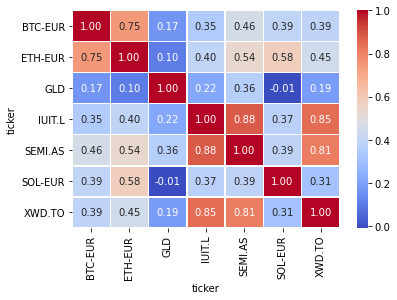

In [3]:
sns.heatmap(ptf.df_price.resample("M").last().pct_change().corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

### Statistiques descriptives

In [4]:
ptf.df_returns.describe()

ticker,BTC-EUR,ETH-EUR,GLD,IUIT.L,SEMI.AS,SOL-EUR,XWD.TO
count,1827.000000,1827.000000,1826.000000,1829.000000,970.000000,1452.000000,1827.000000
mean,0.002187,0.002754,0.000322,0.000696,0.000512,0.006165,0.000348
std,0.034965,0.043743,0.007824,0.012812,0.015986,0.070917,0.009169
min,-0.367353,-0.419488,-0.053694,-0.097400,-0.052580,-0.419284,-0.097633
25%,-0.012878,-0.017001,-0.001887,-0.002271,-0.005577,-0.030760,-0.001569
50%,0.000874,0.001323,0.000000,0.000000,0.000000,0.000478,0.000000
75%,0.016959,0.022985,0.003319,0.005599,0.007585,0.037599,0.002984
max,0.215004,0.249699,0.048530,0.107367,0.062206,0.468260,0.088957


### Analyse des returns

In [5]:
metrics.get_returns_analysis(ptf.df_price, frequency="M", quantile=0.05)

,er,vol,ic,var,cvar,drawdown
ticker,,,,,,
BTC-EUR,0.768106,0.715644,1.073307,-0.207800,-0.326155,-0.735719
ETH-EUR,1.005982,0.913819,1.100855,-0.262636,-0.376854,-0.772019
GLD,0.118992,0.148625,0.800614,-0.053696,-0.062711,-0.220022
IUIT.L,0.243184,0.210416,1.155734,-0.091039,-0.097137,-0.334615
SEMI.AS,0.192535,0.321289,0.599256,-0.133436,-0.152928,-0.452721
SOL-EUR,3.147752,2.312874,1.360970,-0.445454,-0.509158,-0.959610
XWD.TO,0.115324,0.135181,0.853110,-0.058070,-0.075552,-0.274812


## Allocation & Stratégie d'investissement

In [18]:
dico_weights = {"BTC-EUR" : 475, "ETH-EUR" :209, "IUIT.L" : 155, "SEMI.AS" : 107.8, "SOL-EUR" : 266.27, "XWD.TO" : 821.3, "GLD" : 206}
weights = pd.DataFrame(index=ptf.df_price.index)
for ticker in ptf.df_price:
    weights[ticker] = dico_weights[ticker]
weights=weights/sum(dico_weights.values())

print("Backtest Statique")
res = ptf.get_quickBacktest(weights, freq="M", q=0.01)
px.line(res["ptf_track"].rename({"0" : "Backtest"}, axis=1), title="Backtest").show()
display(res["risk_metrics"])
risk_contribution = metrics.get_vol_contribution(ptf.df_returns.iloc[:], np.asarray(weights.iloc[-1]))
print("Risk Contribution :")
display(risk_contribution)


Backtest Statique


,er,vol,ic,var,cvar,drawdown
0,0.570846,0.385581,1.480482,-0.160974,-0.192466,-0.528051


Risk Contribution :


,0
ticker,
BTC-EUR,0.336389
ETH-EUR,0.188324
GLD,0.005161
IUIT.L,0.017141
SEMI.AS,0.012368
SOL-EUR,0.357311
XWD.TO,0.083305


In [7]:
scope = res["ptf_track"].pct_change(periods=252).dropna()
scope[scope>0].dropna().shape[0]/scope.shape[0]

0.7807351077313055

#TODO : 

metrics => 
-risk
-performance
-signal

creer un module deals =>
-nominal exct 
-portfolio a un attribut deals + signal 

une fois deal implémenté => faire une version backtest avec drift des poids

creer un module signal

ajouter des graphes win/lose ratio après une période x d'invest => permet de mesurer l'effet timing

